![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [68]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [ ]:
# Celda 1.1
print(bikes.groupby('workingday').total.mean())
print()
bikes.groupby('workingday').total.mean().describe()



workingday
0    188.506621
1    193.011873
Name: total, dtype: float64



count      2.000000
mean     190.759247
std        3.185694
min      188.506621
25%      189.632934
50%      190.759247
75%      191.885560
max      193.011873
Name: total, dtype: float64

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64



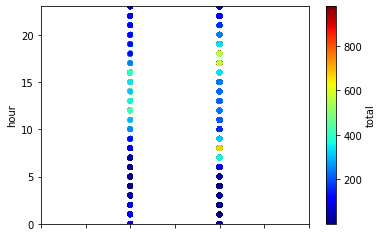

In [55]:
# Celda 1.2
print(bikes.groupby('hour').total.mean())
print()
bikes.groupby('hour').total.mean().describe()

import matplotlib.pyplot as plt

bikes.plot(kind='scatter', x='workingday', y='hour', c='total', colormap='jet', xlim=(-1,2), ylim=(0,23))




En cuanto a la variable **workingday**, se puede observar que las rentas promedio son similares en dias laborales y dias no laborales es similar.

En cuanto a la variable **hour**, se observa que las rentas promedio en la mnoche y madrugada son bajas y ciertas horas del dia donde hay un promedio alto de rentas. Especificamente se observan 2 picos, a las 8am y a las 5pm. 

En el scatter Plot podemos visualizar por medio de una escala de colores el   aproximado de rentas promedio por cada hora del dia, dependiendo si es workingday o no. 

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

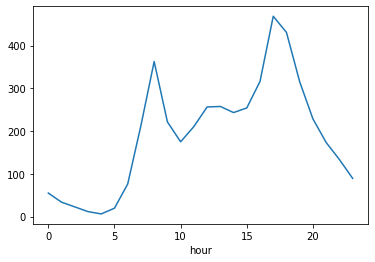

In [ ]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

En la gráfica superior se pueden observar 2 picos de rentas promedio x hora, en las horas de la mañana temprano tipo 8:00 am se observa una alta demanda y en la tarde tipo 5:00 pm, siendo este último pico el de mayor demanda, **cerca de un 30% mas**, pero luego de darse estos 2 picos la demanda se decrementa. 

hour
0.0      94.489655
1.0      71.910345
2.0      53.748252
3.0      25.534722
4.0       8.544828
5.0       9.373239
6.0      19.993103
7.0      47.268966
8.0     112.255172
9.0     177.924138
10.0    263.806897
11.0    325.386207
12.0    379.110345
13.0    387.820690
14.0    378.731034
15.0    373.703448
16.0    367.648276
17.0    339.124138
18.0    292.248276
19.0    242.344828
20.0    183.806897
21.0    148.737931
22.0    123.351724
23.0     90.606897
Name: total, dtype: float64

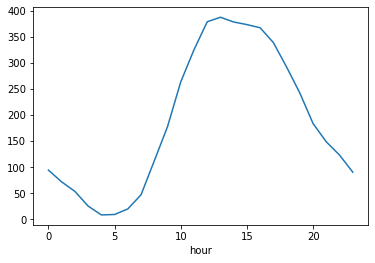

In [ ]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes.where(bikes['workingday'] == 0).groupby('hour').total.mean().plot()
bikes.where(bikes['workingday'] == 0).groupby('hour').total.mean()

En la gráfica superior se puede observar que cuando **"workingday"=0**, a medida que avanza el día parecen incrementarse la rentas promedio x hora entre las 4:00am y las 1:00pm, pero despues del medio dia comienza a disminuir la demanda.

hour
0.0      36.732258
1.0      16.003236
2.0       8.436066
3.0       4.892734
4.0       5.363636
5.0      24.529032
6.0     102.577419
7.0     290.690323
8.0     479.945161
9.0     242.293548
10.0    133.596774
11.0    157.019355
12.0    199.347267
13.0    197.160772
14.0    180.366559
15.0    198.627010
16.0    292.466238
17.0    529.209003
18.0    495.485531
19.0    349.282958
20.0    249.363344
21.0    184.855305
22.0    138.344051
23.0     88.996785
Name: total, dtype: float64

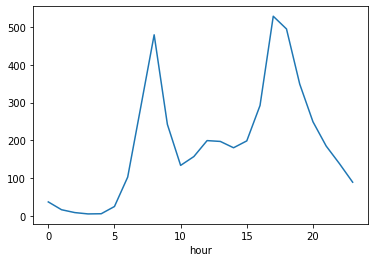

In [ ]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes.where(bikes['workingday'] == 1).groupby('hour').total.mean().plot()
bikes.where(bikes['workingday'] == 1).groupby('hour').total.mean()

En la gráfica superior se puede observa que cuando **"workingday"=1** se pueden observar 2 picos de rentas promedio x hora, en las horas de la mañana temprano tipo 8:00 am se observa una alta demanda y en la tarde tipo 5:00pm, siendo este último pico el de mayor demanda, **cerca de un 10% mas**, pero luego de darse estos 2 picos la demanda se decrementa notablemente, esto se puede explicar pues entre semana (dias laborales) los clientes pueden usar las bicicletas solo para transportarse a la oficina y no a lo largo del día.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [69]:
# Celda 3
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
X=bikes[['hour','workingday']]
y=bikes[['total']]

# Iba a partir en Train y Test, pero en el enuncuado y en slack indican que se haga el ajuste del modelo con todos los datos.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


lr=LinearRegression()
#lr.fit(X_train, y_train)
lr.fit(X, y)


#y_pred = lr.predict(X_test)
y_pred = lr.predict(X)

print("-"*64)
print("Coeficientes de hour y workingday ...")


print(lr.coef_)


print("-"*64)
print("Evaluando desempeño del Modelo...")

mi_r2 = r2_score(y, y_pred)
print("r2:")
print(mi_r2)
test_set_mse = mean_squared_error(y, y_pred)
print("mse:")
print(test_set_mse)


----------------------------------------------------------------
Coeficientes de hour y workingday ...
[[10.49206282  4.07248627]]
----------------------------------------------------------------
Evaluando desempeño del Modelo...
r2:
0.16059115011434855
mse:
27541.255252498402


Los coeficientes indican que, en promedio por cada incremento de una unidad en la **hora**, se incrementan en 10.55 la variable **total**, y de igual manera, si es un **workingday** se incrementa en 6.77 la variable **total**.

Como se puede observar el R2 en el train es muy bajo y se puede concluir que este modelo con las varibles seleccionadas carece de poder predictivo.  De otra parte si vemos las gráficas del punto 2 del taller, estas no son lineales por lo cual un modelo lineal en principio no parece ser la mejor elección.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [70]:
# Celda 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, mse
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for i,split in enumerate(splits):

            mse = mse_impurity(X.iloc[:, j], y, split)
           
            #Si es la primera vez q entra guarda el primer mse como base, ya luego empieza buscar el menor mse
            if (i==0 and j==0) or mse < best_split[2]:
                best_split = [j, split, mse]
    #print('return')
    #print(best_split)
    return best_split



def mse_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    mean_l = y_l.mean()
    mean_r = y_r.mean()
    
    mse_l =  np.sum((y_l-mean_l)**2)/y_l.count()
    mse_r =  np.sum((y_r-mean_r)**2)/y_r.count()
   
    mse_split_feature = mse_l + mse_r
    
    return mse_split_feature

def tree_grow(X, y, level=0, max_mse=1000, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1, mse=0)
        return tree
    
    # Calcular la mejor división
    j, split, mse = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean()) 
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], mse=mse)
    # Revisar el criterio de parada 
    
    #print('criterio de parada')
    #print(mse)
    #print(max_mse)
    
    if mse < max_mse:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, max_mse=max_mse, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, max_mse=max_mse, max_depth=max_depth, num_pct=num_pct)
    
    return tree
  

tree_grow(X,  bikes.total, level=0, max_mse=500, max_depth=6, num_pct=8)


{'level': 0,
 'mse': 33221.7624761002,
 'n_samples': 10886,
 'sl': {'level': 1,
  'mse': 1259.9251623741604,
  'n_samples': 2232,
  'sl': {'level': 2,
   'mse': 1588.7729536599095,
   'n_samples': 1790,
   'sl': {'level': 3,
    'mse': 2062.470732360731,
    'n_samples': 1357,
    'sl': {'level': 4,
     'mse': 2452.3637074572403,
     'n_samples': 433,
     'sl': {'level': 5,
      'mse': 3389.2142687277046,
      'n_samples': 290,
      'sl': {'level': 6,
       'mse': 0,
       'n_samples': 145,
       'split': -1,
       'y_pred': 94},
      'split': [0, 1.0],
      'sr': {'level': 6,
       'mse': 0,
       'n_samples': 145,
       'split': -1,
       'y_pred': 71},
      'y_pred': 83},
     'split': [0, 2.0],
     'sr': {'level': 5, 'mse': 0, 'n_samples': 143, 'split': -1, 'y_pred': 53},
     'y_pred': 73},
    'split': [1, 1.0],
    'sr': {'level': 4,
     'mse': 578.1305798325806,
     'n_samples': 924,
     'sl': {'level': 5,
      'mse': 844.0295356440588,
      'n_samples': 

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

(0.6501337581022684, 8)


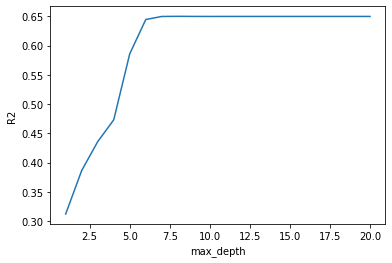

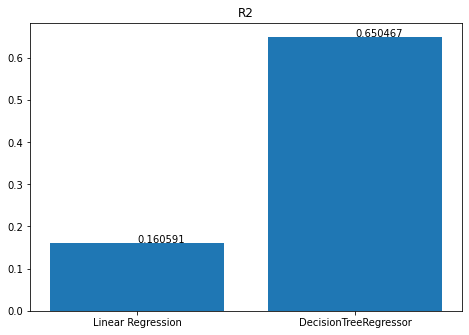

In [70]:
# Celda 5  
%matplotlib inline
import matplotlib.pyplot as plt

max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
r2_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    regtree = DecisionTreeRegressor(max_depth=depth, random_state=1)
    r2_scores.append(cross_val_score(regtree, np.array(X_train), np.array(y_train), cv=10, scoring='r2').mean())

plt.plot(max_depth_range, r2_scores)
plt.xlabel('max_depth')
plt.ylabel('R2')

# Mejor R2 (desempeño del modelo) y su correspondiente max_depth
print(sorted(zip(r2_scores, max_depth_range))[::-1][0])

# max_depth=8 fue el mejor, se ajusta un árbol usando este valor 

regtree=DecisionTreeRegressor(max_depth=8, random_state=1)
regtree.fit(X_train,y_train)


#/*Comparacion R2*/
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("R2")
ejeX = ['Linear Regression', 'DecisionTreeRegressor']
ejeY = [mi_r2,regtree.score(X_test,y_test)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],np.round(y[i], 6))
addlabels(ejeX,ejeY,plt)
plt.show()



Se calibro el parámetro max_depth, obteniendo 8 como el valor óptimo para max_depth que genera el R2 mas alto. 
Comparando el R2 de este modelo DecisionTreeRegressor con el R2 de la Regresion lineal del punto 3, el R2 de este modelo resulta ser mucho mejor.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [56]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [57]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [58]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


----------------------------------------------------------------
Regresión Logistica:
----------------------------------------------------------------
Intercept: [-6.25835659e-08]
Coeficiente: [('timedelta', -2.5739694583348677e-05), ('n_tokens_title', -7.258564216513778e-07), ('n_tokens_content', 4.697455032147336e-05), ('n_unique_tokens', -5.239514766649371e-08), ('n_non_stop_words', -7.989175111960519e-08), ('n_non_stop_unique_tokens', -6.954912609405473e-08), ('num_hrefs', 2.881667447553808e-06), ('num_self_hrefs', -3.86527922046634e-09), ('num_imgs', 2.6123867239955555e-06), ('num_videos', 4.020284049589306e-07), ('average_token_length', -4.122928483794902e-07), ('num_keywords', -1.1025164845763391e-07), ('data_channel_is_lifestyle', 1.9547676157445958e-08), ('data_channel_is_entertainment', -3.360082075789724e-08), ('data_channel_is_bus', -7.781479498546927e-08), ('data_channel_is_socmed', 2.3914593369315628e-08), ('data_channel_is_tech', 3.2541392036852834e-08), ('data_channel_i

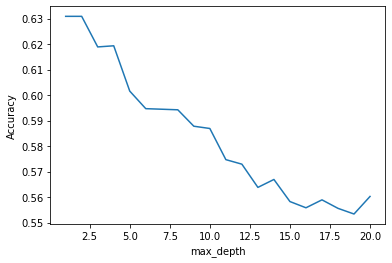

Text(0, 0.5, 'F1-Score')

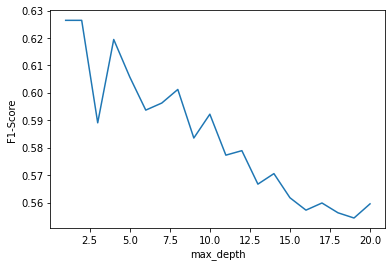

In [62]:
# Celda 6 Regresión Logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

modelo = LogisticRegression(penalty='none')
modelo.fit(X = X_train, y = y_train)

print("-"*64)
print("Regresión Logistica:")
print("-"*64)
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy:", modelo.score(X, y))

y_pred_lr=modelo.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))




# Arbol de Decisión
print()
print("-"*64)
print("Arbol de Decisión:")
print("-"*64)
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del accuracy y F1-Score para cada valor de máxima profundidad (max_depth)
accuracy_scores = []
f1_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())
    f1_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='f1').mean())

# Gráfica max_depth versus accuray
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()
# Gráfica max_depth versus F1-Score
plt.plot(max_depth_range, f1_scores)
plt.xlabel('max_depth')
plt.ylabel('F1-Score')

In [82]:
print('Mejor "accuracy"  y su correspondiente max_depth')
print(sorted(zip(accuracy_scores, max_depth_range))[::-1][0])
print('Mejor "F-1 Score" y su correspondiente max_depth')
print(sorted(zip(f1_scores, max_depth_range))[::-1][0])

Mejor "accuracy"  y su correspondiente max_depth
(0.6308888888888888, 2)
Mejor "F-1 Score" y su correspondiente max_depth
(0.6264200632335681, 2)


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [138]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
models = {'DTClassifier': DecisionTreeClassifier(),
          'DTClassifier_max_depth_2': DecisionTreeClassifier(max_depth=2),
          'LogisticRegression': LogisticRegression()}

bagginclf = {}
f1_scores_vm=[]
accuracys_vm=[]

for model in models.keys():
    #models[model].fit(X_train, y_train)

    bagginclf[model] = BaggingClassifier(base_estimator=models[model], max_samples=300, n_estimators=100, bootstrap=True,
                            random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño (F1-Score, Accuracy) al hacer votación mayoritaria con cada modelo
for model in models.keys():
    print("-"*64)
    print(model)    
    print(models[model])
    bagginclf[model].fit(X_train, y_train)
    y_pred = bagginclf[model].predict(X_test)
    f1_scores_vm.append(metrics.f1_score(y_pred, y_test))
    accuracys_vm.append(metrics.accuracy_score(y_pred, y_test))
    print(metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))



----------------------------------------------------------------
DTClassifier
DecisionTreeClassifier()
0.6567567567567568 0.6613333333333333
----------------------------------------------------------------
DTClassifier_max_depth_2
DecisionTreeClassifier(max_depth=2)
0.631578947368421 0.6453333333333333
----------------------------------------------------------------
LogisticRegression
LogisticRegression()
0.6125760649087221 0.618


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [139]:
# Celda 8
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB

errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

f1_scores_vp=[]
accuracys_vp=[]

for model in models:
  for i in range(bagginclf[model].n_estimators):
    oob_sample = ~bagginclf[model].estimators_samples_[i]
    y_pred_ = bagginclf[model].estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = bagginclf[model].estimators_[i].predict(X_test)
    
  alpha = (1 - errors) / (1 - errors).sum()
  y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

  # Desempeño (F1-Score, Accuracy) al hacer votación ponderada en cada modelo
  print("-"*64)
  print(model) 
  f1_scores_vp.append(metrics.f1_score(y_pred, y_test))
  accuracys_vp.append(metrics.accuracy_score(y_pred, y_test))   
  print(metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))




----------------------------------------------------------------
DTClassifier
0.6631087391594397 0.6633333333333333
----------------------------------------------------------------
DTClassifier_max_depth_2
0.6324549237170597 0.6466666666666666
----------------------------------------------------------------
LogisticRegression
0.6181818181818182 0.622


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

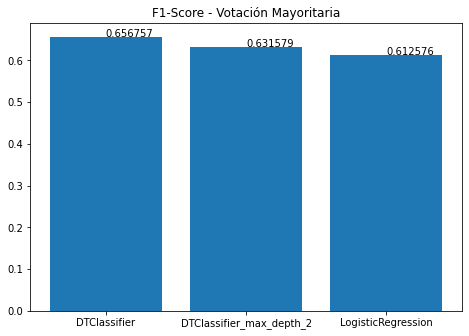

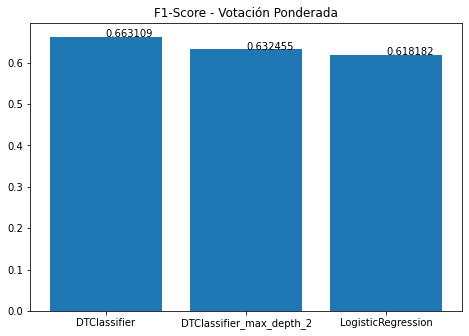

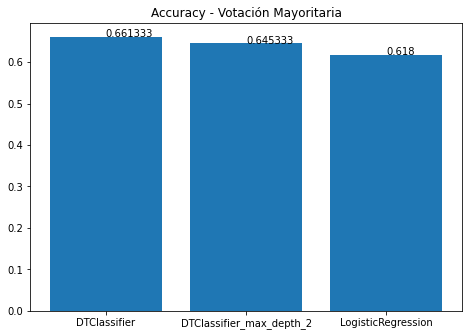

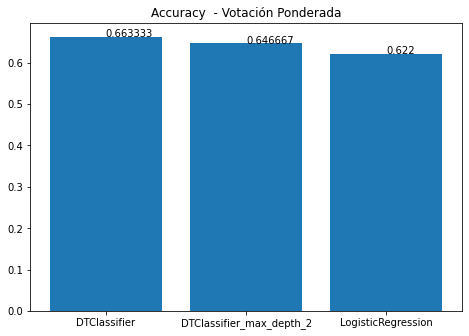

In [143]:
# Celda 9

#/*Comparacion F1-Score*/
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("F1-Score - Votación Mayoritaria")
ejeX = list(models.keys())
ejeY = f1_scores_vm
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],np.round(y[i], 6))
addlabels(ejeX,ejeY,plt)
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("F1-Score - Votación Ponderada")
ejeX = list(models.keys())
ejeY = f1_scores_vp
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],np.round(y[i], 6))
addlabels(ejeX,ejeY,plt)
plt.show()






Se observa que el F1-Score es ligeramente mas alto para el modelo de DTClassifier sin limites de profundidad, de igual manera que es ligeramente mas alto con la Votación Ponderada que con la Votación Mayoritaria.

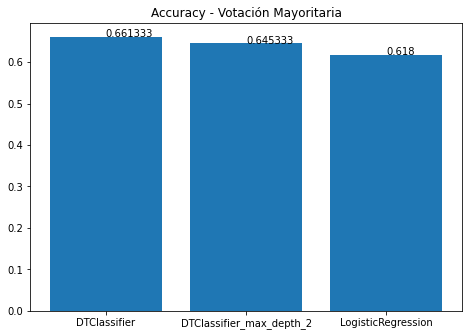

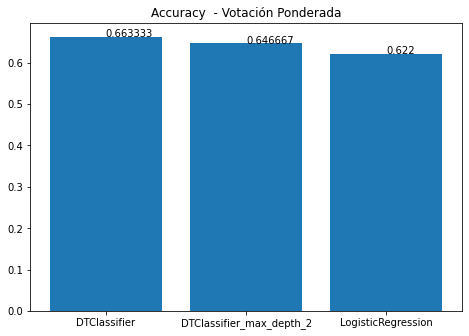

In [144]:
#/*Comparacion Accuracy*/
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy - Votación Mayoritaria")
ejeX = list(models.keys())
ejeY = accuracys_vm
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],np.round(y[i], 6))
addlabels(ejeX,ejeY,plt)
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy  - Votación Ponderada")
ejeX = list(models.keys())
ejeY = accuracys_vp
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],np.round(y[i], 6))
addlabels(ejeX,ejeY,plt)
plt.show()

Se observa que los resultados son similares en ambos puntos 7 (Votacion Mayoritaria) y 8 (Votación Ponderada), sin embargo  se puede apreciar que la Votación Ponderada arroja ligeramente mejores **F1-Score** y mejor **accuracy** en todos los casos, esto pensaria que se debe a que la votación ponderada maneja los pesos, y estos a su vez son mas altos para las predicciones con mejor desempeño, por ende las predicciones con mejor desempeño tendran mas incidencia en la votación, y al final generarán un resultado o una votación mas "justa" en un ensamble con la metodología de **votación ponderada**. 